In [20]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
seed = 7
np.random.seed(seed)

In [21]:
df = pd.read_csv('hongos.csv')
data = df.values
x = data[:, 0:21].astype('float')
y = data[:, 0]

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
print(encoded_y)

[1 0 0 ... 0 1 0]


In [24]:
y_onehot = np_utils.to_categorical(encoded_y)

In [33]:
#neural network model 

def base_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 21, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    #model.add(Dense(output_dim = 1, activation = 'relu'))
    #compile model 
    model.compile(loss='categorical_crossentropy', optimizer = 'Ftrl', metrics= ['accuracy'])
    return model

In [37]:
estimator = KerasClassifier(build_fn=base_model, epochs=50, batch_size=15, verbose=0)

In [38]:
kFold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [39]:
results = cross_val_score(estimator,x,y_onehot, cv=kFold)
print('base model: %.2f%% (%.2f%%)' % (results.mean()*100,results.std()*100))

base model: 91.55% (3.43%)


In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

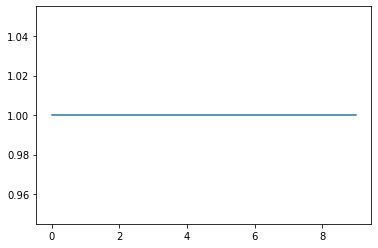

In [ ]:
import seaborn as sns
sns.lineplot(data=results)

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))